## Import the necessary libraries

In [2]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=956188fb515fec1792b012312464ba926f3b5af780fbba2bab1a5863cb63a580
  Stored in directory: /Users/bhanukaushik/Library/Caches/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [1]:
import pandas as pd

In [4]:
#dataset merging
import os
df = pd.DataFrame(columns=['Text','Language'])
for filename in os.listdir('data'):
    f = os.path.join('data', filename)
    if 'csv' in filename:
        if 'sentences' not in filename:
            df1 = pd.read_csv(f)
            if 'language' in df1.columns:
                df1=df1.rename(columns={'language':'Language'})
            df = pd.concat([df,df1],axis=0)   

In [7]:
df.isna().sum()

Text        0
Language    0
dtype: int64

In [8]:
df.shape

(45490, 2)

In [9]:
df3 = df3.rename(columns={"language":"Language"})
df3.head()

,Text,Language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [10]:
df1 = df1.sample(frac=1)
df2 = df2.sample(frac=1)
df3 = df3.sample(frac=1)
df = pd.concat([df1, df2, df3])
df.head()

,Text,Language
9413,الإذن.,Arabic
5926,ευχαριστώ τους ανθρώπους.,Greek
1817,നിങ്ങൾ പിന്നീട് കാണുന്ന ഒരു സന്തോഷ മീറ്റിംഗായി...,Malayalam
4847,"[27]​ Sin publicidad, está alojado por la Fund...",Spanish
2783,Os pedidos que não podem ser atendidos a parti...,Portugeese


In [11]:
df.drop_duplicates(inplace=True)

## Feature Engineering

In [12]:
df.shape

(44776, 2)

In [13]:
df.Language.unique()

array(['Arabic', 'Greek', 'Malayalam', 'Spanish', 'Portugeese', 'Russian',
       'Tamil', 'French', 'English', 'German', 'Dutch', 'Italian',
       'Kannada', 'Turkish', 'Danish', 'Sweedish', 'Hindi', 'Darija',
       'Persian', 'Romanian', 'Pushto', 'Japanese', 'Chinese', 'Estonian',
       'Latin', 'Swedish', 'Indonesian', 'Korean', 'Urdu', 'Portugese',
       'Thai'], dtype=object)

In [14]:
df.Language.replace(to_replace=['Portugeese','Sweedish'],value=['Portuguese','Swedish'],inplace=True)

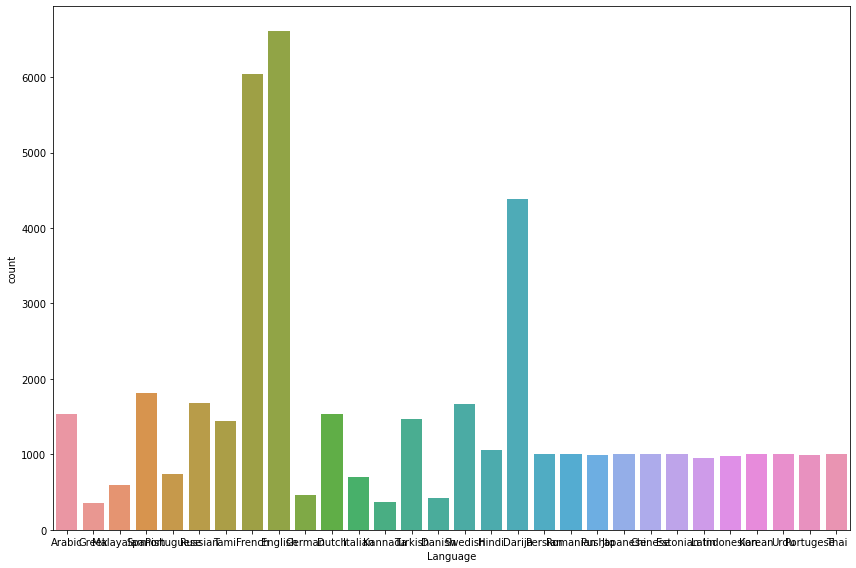

In [15]:
sns.countplot(df.Language)
plt.tight_layout();

In [16]:
#df = df[df.Language.isin(["English","French","Dutch","Spanish","Danish","Italian","Swedish","German","Portuguese","Turkish"])]
df.shape

(44776, 2)

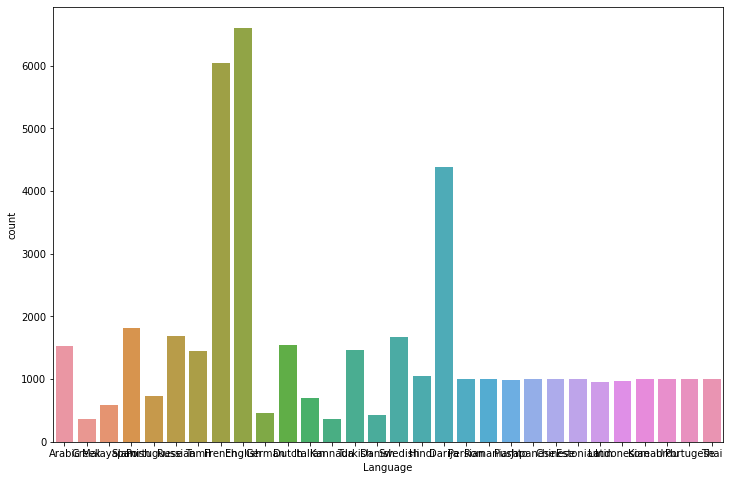

In [17]:
sns.countplot(df.Language);

The target language classes are considerably imbalanced so they need to be accounted for later.

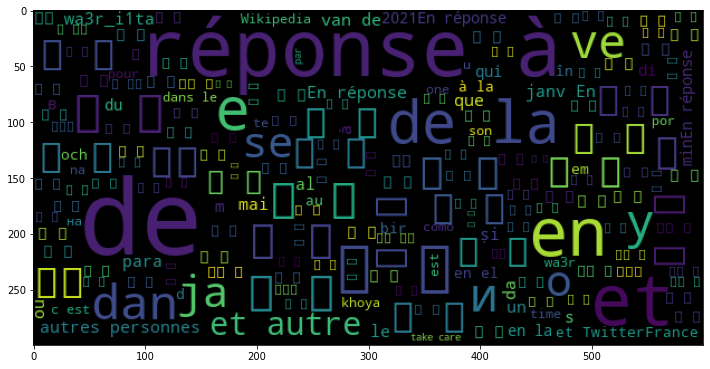

In [18]:
wc = WordCloud(width=600,height=300,random_state=42).generate(' '.join(df.Text))
plt.imshow(wc);

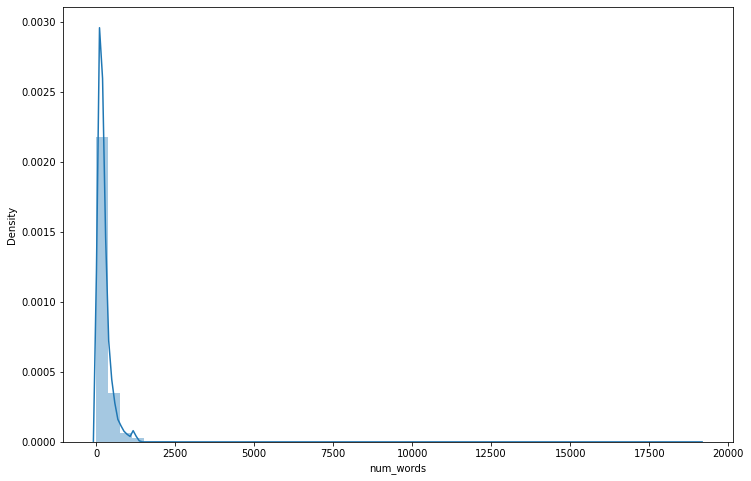

In [19]:
df['num_words'] = df.Text.apply(len)
sns.distplot(df.num_words);

In [20]:
df.num_words.describe()

count    44776.000000
mean       246.536627
std        239.682873
min          1.000000
25%        109.000000
50%        185.000000
75%        307.000000
max      19088.000000
Name: num_words, dtype: float64

In [21]:
max_len = 125

## Text Preprocessing

In [22]:
def text_preprocess(data,col):
    data[col] = data[col].apply(func=clean_html)
    data[col] = data[col].apply(func=remove_)
    data[col] = data[col].apply(func=removeStopWords)
    data[col] = data[col].apply(func=remove_digits)
    data[col] = data[col].apply(func=remove_links)
    data[col] = data[col].apply(func=remove_special_characters)
    data[col] = data[col].apply(func=punct)
    data[col] = data[col].apply(func=non_ascii)
    data[col] = data[col].apply(func=email_address)
    data[col] = data[col].apply(func=lower)
    return data

In [23]:
preprocessed_df = text_preprocess(df,'Text')
preprocessed_df.head()

,Text,Language,num_words
9413,,Arabic,6
5926,,Greek,25
1817,,Malayalam,57
4847,sin publicidad est alojado por la fundacin wik...,Spanish,163
2783,os pedidos que no podem ser atendidos partir c...,Portuguese,276


## Encoding the target label classes

In [24]:
labels_dict = {}
for idx, lang in enumerate(preprocessed_df.Language.unique()):
    labels_dict[lang] = idx
labels_dict

{'Arabic': 0,
 'Greek': 1,
 'Malayalam': 2,
 'Spanish': 3,
 'Portuguese': 4,
 'Russian': 5,
 'Tamil': 6,
 'French': 7,
 'English': 8,
 'German': 9,
 'Dutch': 10,
 'Italian': 11,
 'Kannada': 12,
 'Turkish': 13,
 'Danish': 14,
 'Swedish': 15,
 'Hindi': 16,
 'Darija': 17,
 'Persian': 18,
 'Romanian': 19,
 'Pushto': 20,
 'Japanese': 21,
 'Chinese': 22,
 'Estonian': 23,
 'Latin': 24,
 'Indonesian': 25,
 'Korean': 26,
 'Urdu': 27,
 'Portugese': 28,
 'Thai': 29}

In [25]:
preprocessed_df['Label'] = preprocessed_df.Language.map(labels_dict)
preprocessed_df.head()

,Text,Language,num_words,Label
9413,,Arabic,6,0
5926,,Greek,25,1
1817,,Malayalam,57,2
4847,sin publicidad est alojado por la fundacin wik...,Spanish,163,3
2783,os pedidos que no podem ser atendidos partir c...,Portuguese,276,4


In [26]:
preprocessed_df.sample(frac=1)

,Text,Language,num_words,Label
5435,hola bienvenido,Spanish,18,3
14902,,Urdu,826,27
5829,,Greek,24,1
11005,crpe,Chinese,194,22
9579,otices dautorit fichier dautorit international...,French,463,7
...,...,...,...,...
14658,cest lpoque durant laquelle apparaissent dans ...,French,254,7
12781,achraf zay hakimi zdnexx janv en rponse hbmdai...,Darija,124,17
13587,political democracy presupposes radical decent...,English,1174,8
8337,wikipediaartiklars trovrdighet vilar mycket p ...,Swedish,252,15


## Splitting the preprocessed dataset into train and test sets

In [27]:
train_df, test_df = train_test_split(preprocessed_df,test_size=0.3,random_state=42,shuffle=True,stratify=preprocessed_df.Language)

## Downloading the pretrained tokenizer and xlm-roberta-base language detection model

In [28]:
tokenizer = AutoTokenizer.from_pretrained("papluca/xlm-roberta-base-language-detection")
xlm = TFAutoModelForSequenceClassification.from_pretrained("papluca/xlm-roberta-base-language-detection",from_pt=True)

Downloading:   0%|          | 0.00/502 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFXLMRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaForSequenceClassification for predictions without further training.


## Performing text tokenization

In [29]:
X_train = tokenizer(text=train_df.Text.tolist(),
                   max_length=max_len,
                   padding=True,
                   truncation=True,
                   add_special_tokens=True,
                   return_tensors="tf",
                   return_attention_mask=True,
                   return_token_type_ids=False,
                   verbose=True)

X_test = tokenizer(text=test_df.Text.tolist(),
                  max_length=max_len,
                  padding=True,
                  truncation=True,
                  add_special_tokens=True,
                  return_tensors="tf",
                  return_attention_mask=True,
                  return_token_type_ids=False,
                  verbose=True)

## Fine-tuning the pretrained xlm-roberta-base language detection model

In [30]:
input_ids = Input(shape=(max_len,),dtype=tf.int32,name='input_ids')
attention_mask = Input(shape=(max_len,),dtype=tf.int32,name='attention_mask')

In [31]:
embeddings = xlm(input_ids,attention_mask=attention_mask)[0] # 0 --> final hidden state, 1 --> pooling output
output = Flatten()(embeddings)
output = Dense(units=1024,activation='relu')(output)
output = Dropout(0.3)(output)
output = Dense(units=512,activation='relu')(output)
output = Dropout(0.2)(output)
output = Dense(units=512,activation='relu')(output)
output = Dropout(0.2)(output)
output = Dense(units=128,activation='relu')(output)
output = Dense(units=30,activation='softmax')(output)

model = Model(inputs=[input_ids,attention_mask],outputs=output)
model.layers[2].trainable = True

## Model Architecture

In [32]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 125)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 125)]        0                                            
__________________________________________________________________________________________________
tfxlm_roberta_for_sequence_clas TFSequenceClassifier 278059028   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
flatten (Flatten)               (None, 20)           0           tfxlm_roberta_for_sequence_cl

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


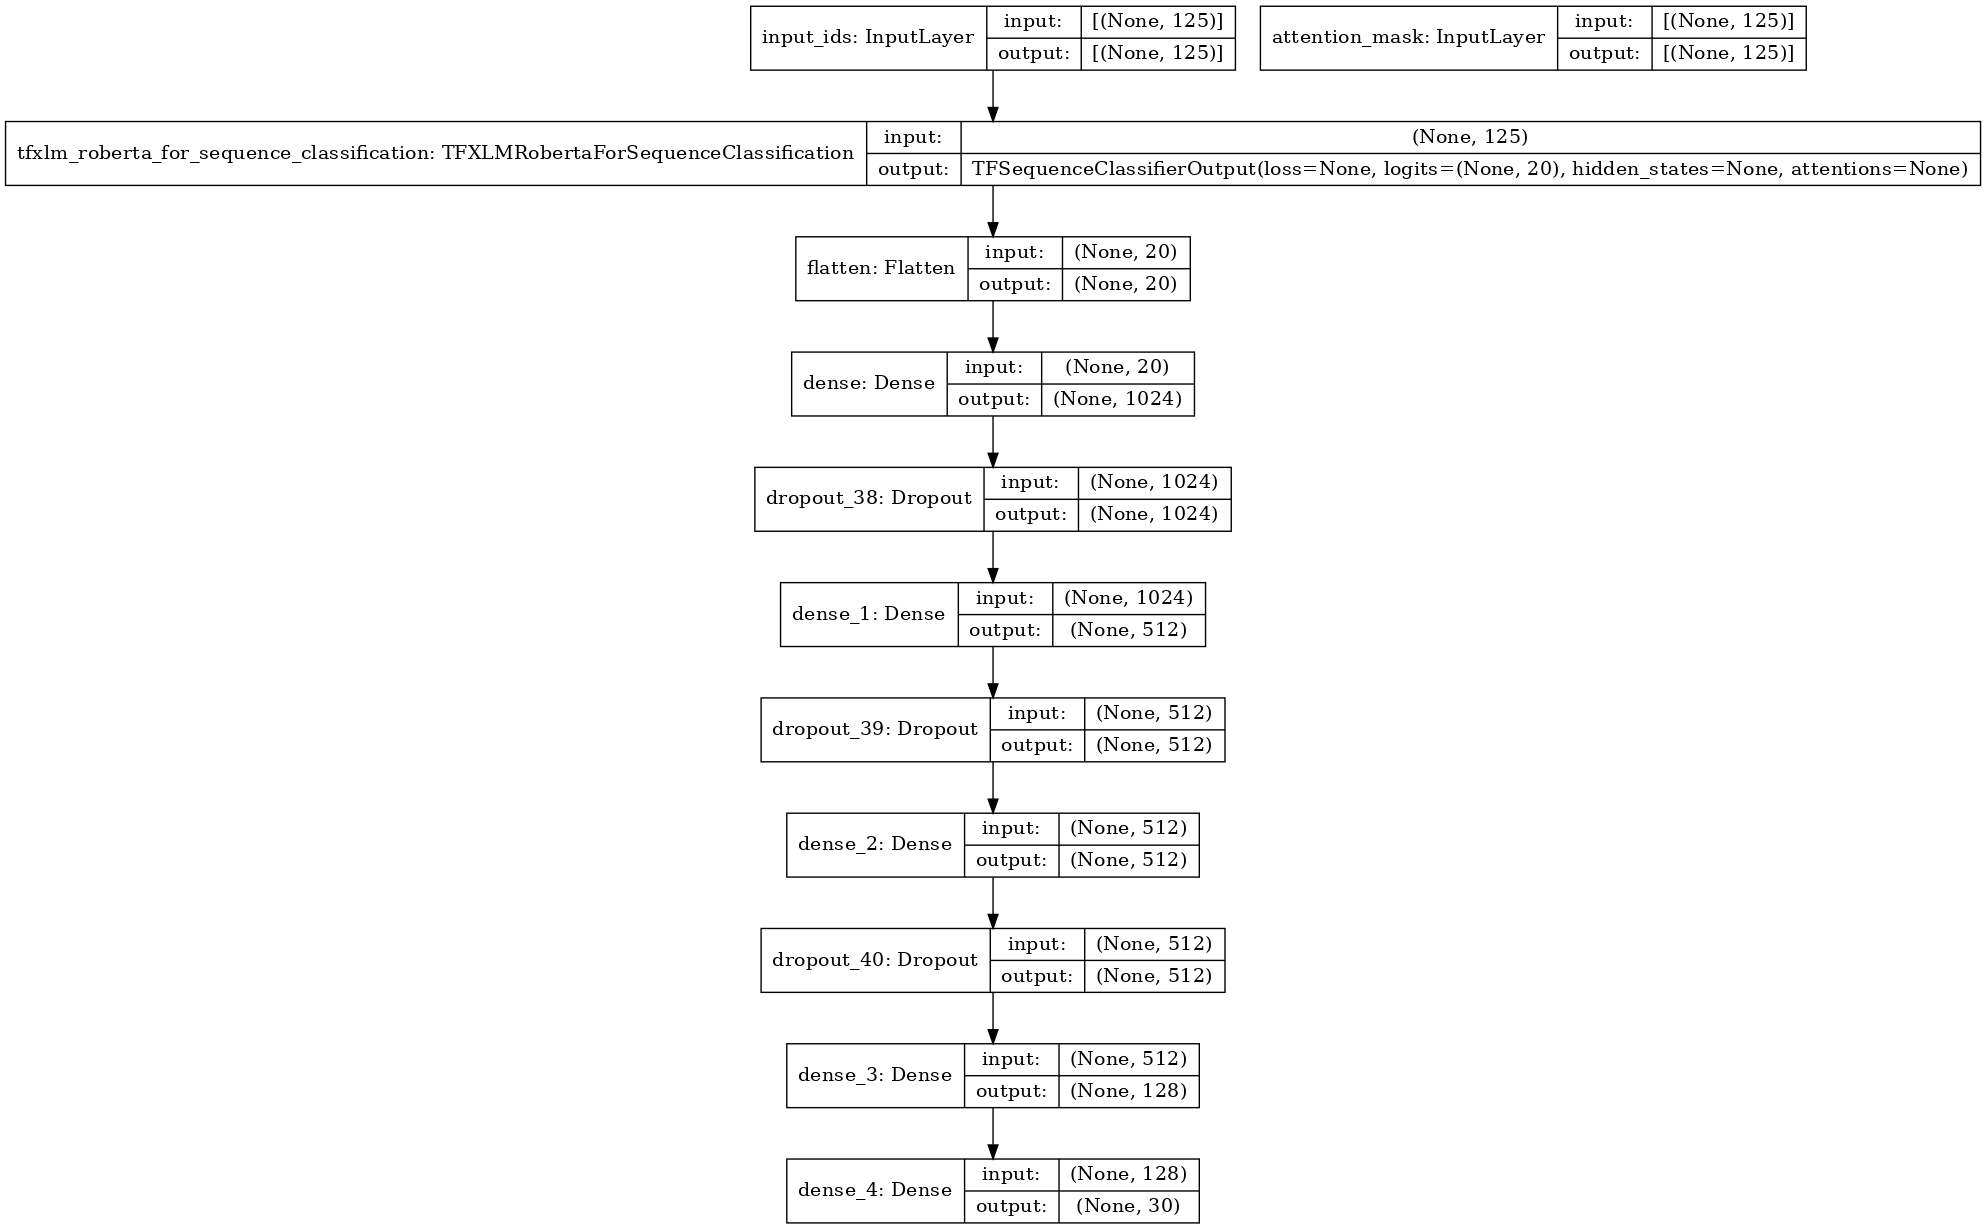

In [33]:
plot_model(model,'model.png',show_shapes=True,dpi=100,rankdir='TB')

## Compiling the model

In [34]:
optimizer = Adam(learning_rate=5e-5,epsilon=2e-8,decay=0.01,clipnorm=1.0)
loss = CategoricalCrossentropy()
metrics = CategoricalAccuracy('balanced_accuracy')
model.compile(loss=loss,optimizer=optimizer,metrics=metrics)

## Training the fine-tuned XLM-Roberta-Base transformer model

In [35]:
es = EarlyStopping(monitor='val_balanced_accuracy',patience=20,verbose=1,mode='max',restore_best_weights=True)
mc = ModelCheckpoint(filepath='checkpoint',monitor='val_balanced_accuracy',mode='max',save_best_only=True,verbose=1)

r = model.fit(x={'input_ids': X_train['input_ids'], 'attention_mask': X_train['attention_mask']},
              y=to_categorical(train_df.Label),
              epochs=10,
              batch_size=64,
              callbacks=[es,mc],
              validation_data=({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']},to_categorical(test_df.Label))
             )

Epoch 1/10
490/490 [==============================] - 540s 1s/step - loss: 1.7793 - balanced_accuracy: 0.5268 - val_loss: 1.3123 - val_balanced_accuracy: 0.6450

Epoch 00001: val_balanced_accuracy improved from -inf to 0.64498, saving model to checkpoint
Epoch 2/10
490/490 [==============================] - 517s 1s/step - loss: 1.2089 - balanced_accuracy: 0.6589 - val_loss: 1.0903 - val_balanced_accuracy: 0.6743

Epoch 00002: val_balanced_accuracy improved from 0.64498 to 0.67431, saving model to checkpoint
Epoch 3/10
490/490 [==============================] - 518s 1s/step - loss: 1.1037 - balanced_accuracy: 0.6686 - val_loss: 1.0505 - val_balanced_accuracy: 0.6797

Epoch 00003: val_balanced_accuracy improved from 0.67431 to 0.67967, saving model to checkpoint
Epoch 4/10
490/490 [==============================] - 517s 1s/step - loss: 1.0604 - balanced_accuracy: 0.6759 - val_loss: 1.0055 - val_balanced_accuracy: 0.6979

Epoch 00004: val_balanced_accuracy improved from 0.67967 to 0.69791

## Analyzing the overall performance of trained model

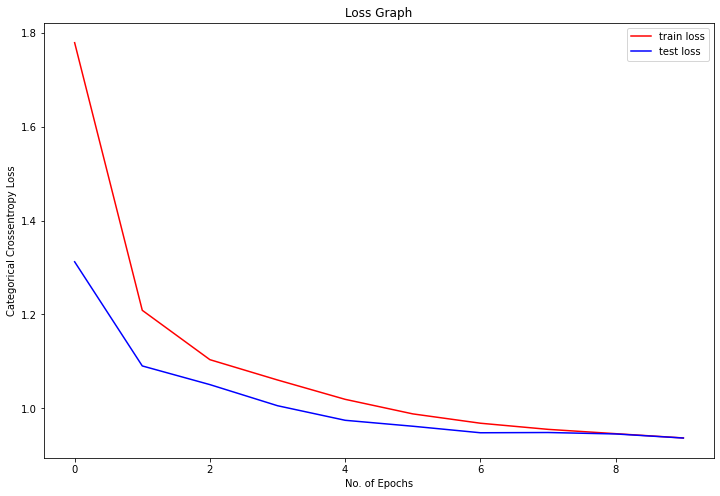

In [38]:
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='test loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Categorical Crossentropy Loss')
plt.title('Loss Graph')
plt.legend();

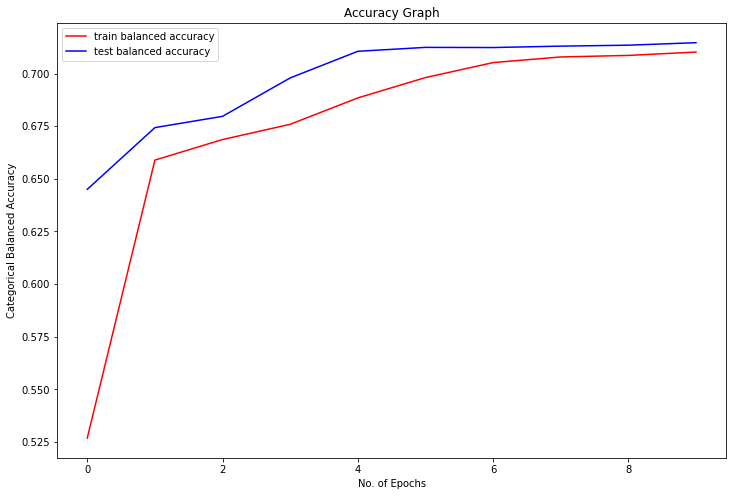

In [39]:
plt.plot(r.history['balanced_accuracy'],'r',label='train balanced accuracy')
plt.plot(r.history['val_balanced_accuracy'],'b',label='test balanced accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Categorical Balanced Accuracy')
plt.title('Accuracy Graph')
plt.legend();

## Saving the model

In [40]:
model.save('language_detector.h5')

## Model Evaluation

In [41]:
loss, acc = model.evaluate({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']},to_categorical(test_df.Label))
print("Categorical Cross-entropy Loss:", loss)
print("Categorical Accuracy:", acc)

420/420 [==============================] - 70s 167ms/step - loss: 0.9366 - balanced_accuracy: 0.7147
Categorical Cross-entropy Loss: 0.9366497993469238
Categorical Accuracy: 0.7146579027175903


In [42]:
test_predictions = model.predict({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']})
test_predictions = np.argmax(test_predictions,axis=1)
print("Confusion Matrix:")
print(confusion_matrix(test_df.Label,test_predictions))
print('-----------------------------')
print("Encoded Labels:")
print(labels_dict)
print('-----------------------------')
print("Classification Report:")
print(classification_report(test_df.Label,test_predictions))

Confusion Matrix:
[[   0    0    0    2    1  401    1    1    9    0    1    0    0    1
     0    1    0    0    0    0    0   34    6    0    1    0    0    0
     0    0]
 [   0    0    0    0    0   91    0    0    5    0    0    0    0    0
     0    0    0    0    0    0    0   11    0    0    0    0    0    0
     0    0]
 [   1    0    0    0    0  169    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    6    1    0    0    0    0    0
     0    0]
 [   0    0    0  524    2    0    0    2    1    1    1    3    0    0
     0    0    0    0    0    0    0    5    0    0    3    0    0    0
     0    2]
 [   0    0    0    3  209    0    0    0    1    0    0    2    0    0
     0    0    0    1    0    0    0    0    0    0    0    0    0    0
     5    0]
 [   2    0    0    1    0  438    0    1    5    3    0    0    0    0
     0    0    0    0    0    0    0   48    4    1    1    0    0    0
     0    2]
 [  10    0    0    0    0  339    0    

The results are quite outstanding as the fine-tuned xlm-roberta-base transformer model has produced an amazing f1-score of more than 95% for all the languages.

If you adore my work, please don't forget to upvote it! 